In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [2]:
from xgboost import XGBRegressor

In [3]:
# Lectura de datos
df0 = pd.read_csv('salidas/base_RF.csv')
df = df0[df0.columns[1:]]
df.columns

C:\Users\daago\AppData\Local\Temp\ipykernel_19176\2951722974.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('salidas/base_RF.csv')


Index(['y', 'x', 'Localidad', 'Estacion', 'year', 'month', 'pm10', 'pm25',
       'o3', 'co', 't2', 'ws', 'wd', 'rn', 'Codigo localidad', 'MuertesxPM25',
       'Poblacion'],
      dtype='object')

In [4]:
# Seleccionar registros con todos los datos de pm25: Con esto se va construir el modelo
df_clean = df.dropna(subset= ['pm25']).copy()
df_clean = df_clean[df_clean["pm25"] < 100]
df1 = df_clean[['y', 'x', 'year', 'month',  'pm10', 'pm25',
       'o3', 'co', 't2', 'ws', 'wd', 'rn', 'Codigo localidad', 'MuertesxPM25', 'Poblacion']].copy()

In [5]:
# Imputar los datos de las variables restantes con Miss Forest
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(df1)
X_imputed = pd.DataFrame(X_imputed, columns = df1.columns).round(3)
datos = X_imputed.copy()

C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 0


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 1


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 2


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 3


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 4


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 5


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 6


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 7


In [6]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = "pm25")
y = datos['pm25']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123,
                                        test_size = 0.2
                                    )


In [7]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }



In [8]:
# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train.shape[0],
                    size= int(X_train.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train.iloc[idx_validacion, :].copy()
y_val = y_train.iloc[idx_validacion].copy()

X_train_grid = X_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# al método .fit()
fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val, y_val)],
              "verbose"               : 0
             }


In [9]:
# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_grid, y = y_train_grid, **fit_params)

C:\Users\daago\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\daago\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=123),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=N...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                 

In [10]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
20,gbtree,0.01,10,0.5,-2.408761,0.002941,-0.660921,0.047058
22,gbtree,0.01,20,0.5,-2.412002,0.010522,-0.609491,0.072793
12,gbtree,0.01,None,0.5,-2.436316,0.043348,-1.083921,0.119864
18,gbtree,0.01,5,0.5,-2.481098,0.044542,-1.332049,0.140809


In [11]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Número de árboles del modelo final (early stopping)
# ==============================================================================
n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 10, 'subsample': 0.5} : -2.408761246340702 neg_mean_absolute_error
Número de árboles incluidos en el modelo: 536


In [12]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X_test)
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones
       )
print(f"El error (mae) de test es: {mae}")

El error (mae) de test es: 1.9786741023118894


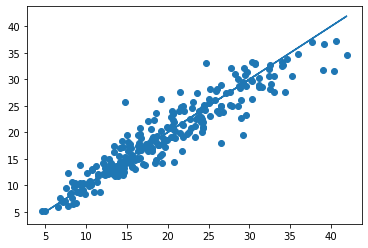

In [13]:
import matplotlib.pyplot as plt
y_pred = modelo_final.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)
plt.show()

In [14]:
df_fit = pd.DataFrame({'pm25_test': y_test, 'pm25_RF': y_pred})
df_fit.to_excel('salidas/01-XG.xlsx',index=False)
X = df_fit[['pm25_RF']]
y = df_fit['pm25_test']

In [15]:
lm = linear_model.LinearRegression()
lm.fit(X.values.reshape(-1,1), y.values.reshape(-1,1))
PM25_pred = lm.predict(X.values.reshape(-1,1))

# Información del modelo
# ==============================================================================
print("Intercept:", lm.intercept_)
print("Coeficiente:", list(zip(X.columns, lm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lm.score(X, y))
print("rmse:",mean_squared_error(y,PM25_pred,squared = False))

Intercept: [0.30197906]
Coeficiente: [('pm25_RF', 0.9980353)]
Coeficiente de determinación R^2: 0.8837700701330156
rmse: 2.691644334920536


C:\Users\daago\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
###### Usar el modelo para los demás 


In [17]:
df_final = df0[['Unnamed: 0','y', 'x', 'year', 'month',  'pm10',
       'o3', 'co', 't2', 'ws', 'wd', 'rn', 'Codigo localidad', 'MuertesxPM25', 'Poblacion']]
df_final

,Unnamed: 0,y,x,year,month,pm10,o3,co,t2,ws,wd,rn,Codigo localidad,MuertesxPM25,Poblacion
0,0,10,8,2008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,168.0,178732
1,1,10,8,2008,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12.0,178732
2,2,10,8,2008,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,25.0,178732
3,3,10,8,2008,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,35.0,178732
4,4,10,8,2008,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,20.0,178732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35835,35835,19,9,2020,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,115.0,384943
35836,35836,19,9,2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,393366
35837,35837,19,9,2021,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,393366
35838,35838,19,9,2021,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,393366


In [18]:
imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(df_final)
X_imputed = pd.DataFrame(X_imputed, columns = df_final.columns).round(3)
X_imputed

C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 0


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 1


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 2


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 3


C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\daago\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 4


,Unnamed: 0,y,x,year,month,pm10,o3,co,t2,ws,wd,rn,Codigo localidad,MuertesxPM25,Poblacion
0,0.0,10.0,8.0,2008.0,1.0,48.396,17.070,1.013,14.362,0.897,222.503,0.126,12.0,168.00,178732.0
1,1.0,10.0,8.0,2008.0,2.0,51.873,15.481,1.059,14.574,0.872,225.420,0.193,12.0,12.00,178732.0
2,2.0,10.0,8.0,2008.0,3.0,50.366,15.248,1.041,14.572,0.883,224.520,0.178,12.0,25.00,178732.0
3,3.0,10.0,8.0,2008.0,4.0,44.178,11.786,0.997,14.579,0.868,225.633,0.176,12.0,35.00,178732.0
4,4.0,10.0,8.0,2008.0,5.0,42.909,8.789,1.010,14.640,0.864,227.436,0.188,12.0,20.00,178732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35835,35835.0,19.0,9.0,2020.0,12.0,23.872,13.053,0.652,14.246,1.274,153.973,0.187,5.0,115.00,384943.0
35836,35836.0,19.0,9.0,2021.0,1.0,22.092,14.345,0.553,14.365,1.476,158.566,0.072,5.0,45.16,393366.0
35837,35837.0,19.0,9.0,2021.0,2.0,25.071,14.135,0.718,14.477,1.461,158.441,0.123,5.0,33.77,393366.0
35838,35838.0,19.0,9.0,2021.0,3.0,25.538,14.240,0.742,14.503,1.408,157.850,0.171,5.0,16.62,393366.0


In [19]:
X_final = X_imputed[X_imputed.columns[1:]]
X_imputed['XG'] = modelo_final.predict(X_final)
X_imputed

,Unnamed: 0,y,x,year,month,pm10,o3,co,t2,ws,wd,rn,Codigo localidad,MuertesxPM25,Poblacion,XG
0,0.0,10.0,8.0,2008.0,1.0,48.396,17.070,1.013,14.362,0.897,222.503,0.126,12.0,168.00,178732.0,18.630013
1,1.0,10.0,8.0,2008.0,2.0,51.873,15.481,1.059,14.574,0.872,225.420,0.193,12.0,12.00,178732.0,20.046169
2,2.0,10.0,8.0,2008.0,3.0,50.366,15.248,1.041,14.572,0.883,224.520,0.178,12.0,25.00,178732.0,21.168566
3,3.0,10.0,8.0,2008.0,4.0,44.178,11.786,0.997,14.579,0.868,225.633,0.176,12.0,35.00,178732.0,17.724007
4,4.0,10.0,8.0,2008.0,5.0,42.909,8.789,1.010,14.640,0.864,227.436,0.188,12.0,20.00,178732.0,16.493977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35835,35835.0,19.0,9.0,2020.0,12.0,23.872,13.053,0.652,14.246,1.274,153.973,0.187,5.0,115.00,384943.0,12.543516
35836,35836.0,19.0,9.0,2021.0,1.0,22.092,14.345,0.553,14.365,1.476,158.566,0.072,5.0,45.16,393366.0,11.829302
35837,35837.0,19.0,9.0,2021.0,2.0,25.071,14.135,0.718,14.477,1.461,158.441,0.123,5.0,33.77,393366.0,14.485323
35838,35838.0,19.0,9.0,2021.0,3.0,25.538,14.240,0.742,14.503,1.408,157.850,0.171,5.0,16.62,393366.0,14.640018


In [20]:
df_final_pm25 = df0[['Unnamed: 0','pm25']]


In [21]:
df_sol = pd.merge(X_imputed,df0[['Unnamed: 0','pm25']], on = 'Unnamed: 0')


In [22]:
df_sol1 = df_sol.dropna()
df_sol1 = df_sol1[df_sol1.pm25 <100]

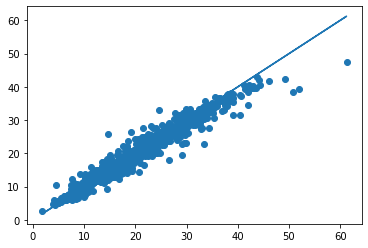

In [23]:
plt.scatter(df_sol1.pm25,df_sol1.XG)
plt.plot(df_sol1.pm25, df_sol1.pm25)
plt.show()

In [24]:
df_fit = pd.DataFrame({'pm25_test': df_sol1.pm25, 'pm25_RF': df_sol1.XG})
#df_fit.to_excel('salidas/02-XG.xlsx',index=False)
X = df_fit[['pm25_RF']]
y = df_fit['pm25_test']
lm = linear_model.LinearRegression()
lm.fit(X.values.reshape(-1,1), y.values.reshape(-1,1))
PM25_pred = lm.predict(X.values.reshape(-1,1))

# Información del modelo
# ==============================================================================
print("Intercept:", lm.intercept_)
print("Coeficiente:", list(zip(X.columns, lm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lm.score(X, y))
print("rmse:",mean_squared_error(y,PM25_pred,squared = False))

Intercept: [-0.52669525]
Coeficiente: [('pm25_RF', 1.0405701)]
Coeficiente de determinación R^2: 0.9590061550992962
rmse: 1.7452193656200885


C:\Users\daago\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [25]:
df_sol

,Unnamed: 0,y,x,year,month,pm10,o3,co,t2,ws,wd,rn,Codigo localidad,MuertesxPM25,Poblacion,XG,pm25
0,0.0,10.0,8.0,2008.0,1.0,48.396,17.070,1.013,14.362,0.897,222.503,0.126,12.0,168.00,178732.0,18.630013,NaN
1,1.0,10.0,8.0,2008.0,2.0,51.873,15.481,1.059,14.574,0.872,225.420,0.193,12.0,12.00,178732.0,20.046169,NaN
2,2.0,10.0,8.0,2008.0,3.0,50.366,15.248,1.041,14.572,0.883,224.520,0.178,12.0,25.00,178732.0,21.168566,NaN
3,3.0,10.0,8.0,2008.0,4.0,44.178,11.786,0.997,14.579,0.868,225.633,0.176,12.0,35.00,178732.0,17.724007,NaN
4,4.0,10.0,8.0,2008.0,5.0,42.909,8.789,1.010,14.640,0.864,227.436,0.188,12.0,20.00,178732.0,16.493977,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35835,35835.0,19.0,9.0,2020.0,12.0,23.872,13.053,0.652,14.246,1.274,153.973,0.187,5.0,115.00,384943.0,12.543516,NaN
35836,35836.0,19.0,9.0,2021.0,1.0,22.092,14.345,0.553,14.365,1.476,158.566,0.072,5.0,45.16,393366.0,11.829302,NaN
35837,35837.0,19.0,9.0,2021.0,2.0,25.071,14.135,0.718,14.477,1.461,158.441,0.123,5.0,33.77,393366.0,14.485323,NaN
35838,35838.0,19.0,9.0,2021.0,3.0,25.538,14.240,0.742,14.503,1.408,157.850,0.171,5.0,16.62,393366.0,14.640018,NaN


In [26]:
df_sol.to_csv('salidas/Salida_XGBoost.csv',sep=';',index=False)